In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

data collection and processing

In [ ]:
#loading the csv data to a pandas dataframe
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
#print first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#no of rows and colums
gold_data.shape

(2290, 6)

In [ ]:
#gettinf info about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**correlation**

1. positive correlation
2. negative correlation

In [ ]:
correlation = gold_data.drop(columns=['Date']).corr()

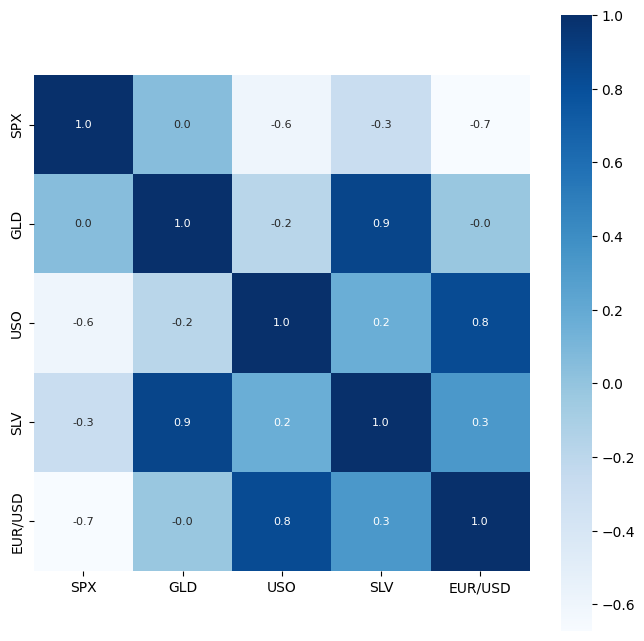

In [ ]:
#constructing a heatmap to understand a correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

In [ ]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


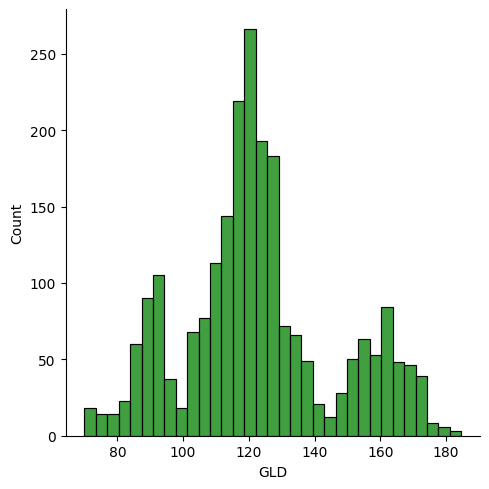

In [ ]:
#range of gold values or check distribution of gold price
sns.displot(gold_data['GLD'],color='green')

splitting the features and target

In [ ]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into traing and test data

In [ ]:
X_train ,X_test , Y_train , Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

model training: Random forest Regressor

In [ ]:
regressor= RandomForestRegressor(n_estimators=100)


training the model

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

**model evaluation**

In [ ]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.63439969  82.14319966 115.98750039 127.65980051 120.65450117
 154.90839732 150.72249846 126.26119993 117.54589871 126.0282005
 116.8259006  172.11350069 141.8595984  167.81589813 114.95130029
 117.81970088 137.37840346 169.98900063 159.64220312 159.11779836
 155.17990001 125.46740005 176.3924993  157.21800265 125.16810054
  93.8128996   77.65529982 120.42829986 119.09979926 167.39940002
  88.34810057 125.39870009  91.25290054 117.61020037 121.09899919
 136.36030059 115.64370109 115.18950057 148.6153998  107.20230081
 104.42080244  87.23289803 126.63420054 117.73040027 152.65709903
 119.65789975 108.33109997 108.34909841  93.30380062 127.15909772
  75.27190036 113.64019973 121.30960011 111.37899908 118.97909899
 120.71769947 159.32520038 166.50310075 147.02329695  85.94879839
  94.12800039  86.9258988   90.57080023 119.05210068 126.55509993
 127.4725998  168.26390006 122.23359927 117.47239925  98.80750059
 168.6750019  142.90909888 131.9276022  121.16200217 120.89399939
 119.835200

In [ ]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9896723742151324


compare the actual values and predicted values in a plot

In [ ]:
Y_test=list(Y_test)

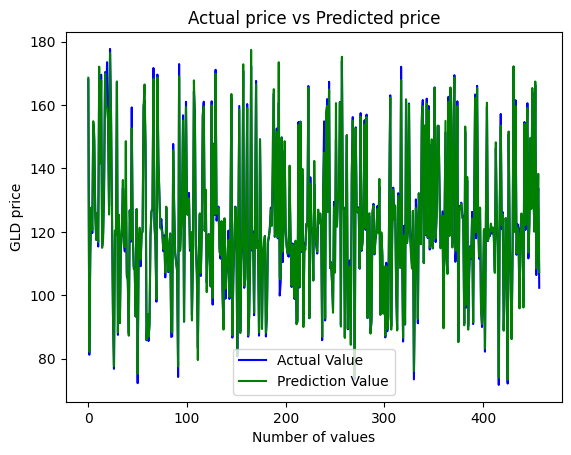

In [ ]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Prediction Value')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()